# NeuroTrade

The task is to predict the day price direction of Amazon.com, Inc. (AMZN).
In the `AMZN.csv` we have daily stock data available for the company.

We have data for the period from `1997` up to year `2020`, and we have split that into training (`1997-2016`), validation (`2016-2018`) and testing (`2018-2020`) period. The data is available in the `AMZN_train.csv`, `AMZN_val.csv` and `AMZN_test.csv` files, respectively.

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.

So, the target would be whether the next day closing price will be higher than the opening price.

## Introduction and data exploration

In our initial exploration, we will load the data sets and see what data attributes are available to us. We will also plot the variables, to see if we can find some trend in the data, and explore the possiblity of engineering some additional features. We will do the data loading and analysis in _pandas_, so let us load that library and begin exploring.

In [1479]:
import pandas as pd

In [1480]:
# load the training set
df_train = pd.read_csv("AMZN_train.csv")

In [1481]:
# (#rows, #columns)
df_train.shape

(4781, 7)

Pandas' `info()` method is really useful to get a quick peak at the column names, types, non-null counts, as well as the data set's memory size! We have mostly numerical columns (5 floats, 1 int) and an object column - the date. No null values at all, and just 261 KB in size.

In [1482]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


The training data set consists of `4781` rows and `7` columns. These are presented above. In the cell below, we use the `describe()` method to get a quick overview about our data set. By default, this includes only numerical columns, since the summary statistics are different for attributes of different type (for example, the date, or other categorical attributes). For numerical columns, this method outputs the non-null count, the mean, standard deviation, the minimum and maximum value, and the 25-th, 50-th and 75-th percentile value.

In [1483]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


If we try to run the same method on the `Date` column (which is treated as object) we get the following output: a count of non-null values, count of unique values, the top (or max) value and its corresponding frequency. While this does give us some information, such that there is exactly one row for each day, and that there are no days with a missing date, it is missing the time range for the column, so what we can do, is to try to run `min()` and `max()` to get the first and last date for the data set. These are `1997-05-15` and `2016-05-13`, respectively.

In [1484]:
df_train["Date"].describe()

count           4781
unique          4781
top       1997-05-15
freq               1
Name: Date, dtype: object

In [1485]:
df_train["Date"].min(), df_train["Date"].max()

('1997-05-15', '2016-05-13')

One last thing we can try in the initial analysis of the data is to plot the stock prices as a function of time. These plots are the first thing you see on any stock market. We can use the _pandas'_ `plot(...)` method to plot lines, by passing the `Date` column as an argument for the `x` axis, and the closing, opening, highest and lowest price to be plotted on the `y` axis. For readability, we also set the figure size to `(12, 9)`.

In [1486]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)

<AxesSubplot:xlabel='Date'>

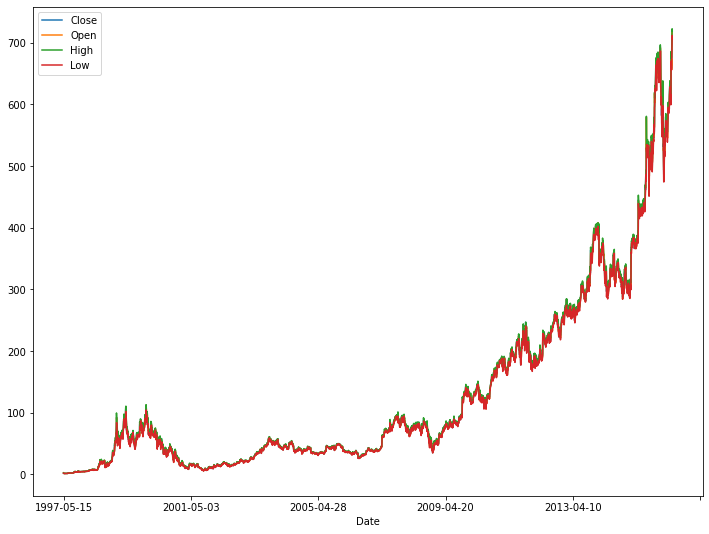

In [1487]:
df_train.plot(x="Date", y=["Close", "Open", "High", "Low"])

All prices are very close to each other, since the lines are overlapping nearly everywhere. But, the price has grown significantly over the years, starting at around \\$100 at the beginning of the century, rising to almost \\$700 only 13 years later!

We would like to repeat the same analysis for the validation and testing set, to make sure that they follow a similar distribution and that there are no surprising errors there. It makes sense to create a function to repeat the process we did for the training set, instead of having to rewrite (or copy-paste) the same code again. Let's do that.

In [1488]:
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

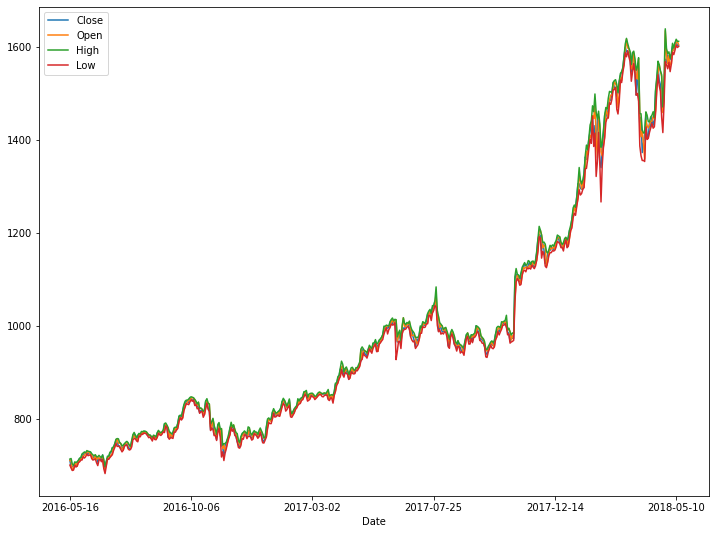

In [1489]:
# read validation and test sets and then analyse them
df_val = pd.read_csv("AMZN_val.csv")
analyse(df_val)

The validation set has the same properties as the training set: no null values, clear column types, valid date range. The stocks have continued to grow in this period.

Shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  13

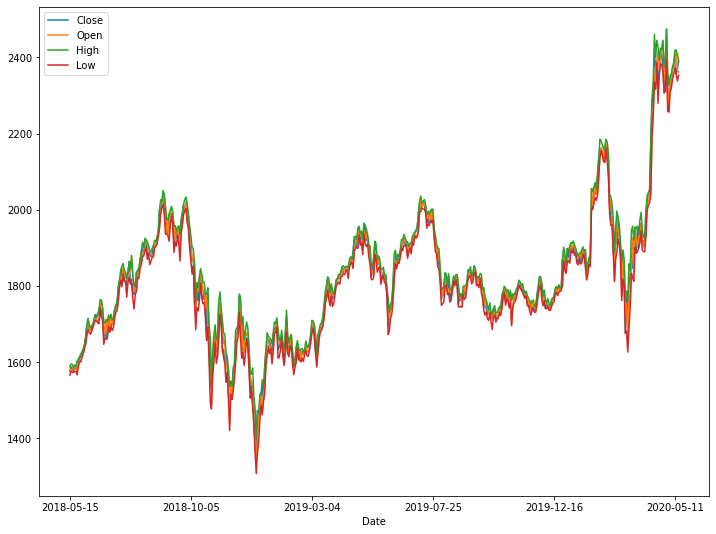

In [1490]:
df_test = pd.read_csv("AMZN_test.csv")
analyse(df_test)

The same comment that holds for the validation set, is also true for the test set. The stocks again continue to grow, but we observe some volatility in this period.

Once we have done our exploration of the data, we can move on to the predictive modeling part of the task. The task was to predict if the next day's closing price will be higher than the opening price. We do not have that information explicitly in our data, so we have to infer it.

This is relatively simple, we just need to compare the closing and opening price for one day in advance.

To achieve that, first we will make sure that the data is sorted by the date. We can use the `sort_values` method and pass in the `Date` column as a parameter, sorting it in ascedning order. 

Next, we need to _shift_ the dataframe by one row / one day, and compare the prices. Pandas has a method for doing exactly that, the [shift](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) method. We specify a period of minus one (so that we shift the data from the next day back). Because it is a logical operation, Pandas would return a `True / False` result for each comparison. We want this to be presented as `1 / 0` for the machine learning models, so we will map it to type `int`. To store all of this information, we will create a new column, called `Target`.

In [1491]:
# make sure that our data is sorted by date
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In [1492]:
# notice that we shift by a period of '-1', this takes the next day's price direction for the current day
# a positive period will take the days from the past
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [1493]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


Running the [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method on the `Target` column gives us the distribution. We have `2292` days where the closing price is higher than the opening, and `2389` where it is lower.

In [1494]:
df_train["Target"].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

We are going to repeat the same procedure for the validation as well as the test set.

In [1495]:
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_val["Target"].value_counts()

0    255
1    248
Name: Target, dtype: int64

In [1496]:
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"].value_counts()

1    255
0    249
Name: Target, dtype: int64

At this point we can start building some machine learning models to predict the target variable. But, before we do that, it might be useful to engineer some additional features that may help us better predict the price direction.
In the next section, we will explore some possibilities for doing feature engineering.

## Feature engineering


We know that the stock prices are time dependent, and that the next day price depends on prices (and many other things) from previous days.

We want to somehow take into account all the values in the last `n` days, capturing the trend, or the magnitude of price change. 

A simple solution would be to calculate a moving average. A moving average computes the arithmetic mean of a sliding window. For each day `X`, moving average of order `n` would be the arithmetic mean of the prices from the days `X - 1`, `X - 2`, ... `X - n`. Pandas has implemented this method. The [rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) method provides us with an interface for sliding (in Pandas terminology - _rolling_) window calculations. The following cells calculate the 3- and 7-days moving average, and add them as a feature into the data set.

Remember that we have our data sorted from before. If the data is not sorted by the date, the results from the `rolling()` method would be invalid.

In [1497]:
df_train["Moving_Average_3"] = (df_train["Close"] - df_train["Open"]).rolling(window=3, min_periods=1).mean()
df_val["Moving_Average_3"] = (df_val["Close"] - df_val["Open"]).rolling(window=3, min_periods=1).mean()
df_test["Moving_Average_3"] = (df_test["Close"] - df_test["Open"]).rolling(window=3, min_periods=1).mean()

In [1498]:
df_train["Moving_Average_7"] = (df_train["Close"] - df_train["Open"]).rolling(window=7, min_periods=1).mean()
df_val["Moving_Average_7"] = (df_val["Close"] - df_val["Open"]).rolling(window=7, min_periods=1).mean()
df_test["Moving_Average_7"] = (df_test["Close"] - df_test["Open"]).rolling(window=7, min_periods=1).mean()

Feature engineering can be more simpler, we can just take the current day's price direction, or the price range. Anything that comes to mind, that can be considered to be useful, should be tested and tried. Feel free to experiment with other features that you can come up on your own.

In [1499]:
# current price direction
# we should repeat the procedure for all three sets (train, val, test)
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

In [1500]:
# price range
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]

The next cell displays a sample of the data with the new features included.

In [1501]:
df_train.sample(10, random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.253335,-0.601429,-1.860001,3.000000
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,0.436666,-0.705710,4.600007,5.419983
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,-6.126663,-2.434283,-11.729996,18.010010
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.937500,-0.580357,2.125000,9.312500
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,4.253326,2.681423,5.829986,8.239990
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,-7.243347,-0.264299,6.890015,27.700012
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,-0.343333,-0.287140,4.199982,6.570007
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.841146,-0.713170,-0.406250,2.187500
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,1.453336,1.212857,1.330002,2.379997
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,0.026042,0.004464,0.072917,0.083333


## Classical machine learning algorithms

The [`sklearn`](https://scikit-learn.org/stable/) library is the most popular library in Python for implementing classical machine learning algorithms. We can use it to try and test a few of them. In the following cells we implement:
1. Logistic regression
2. Decision tree
3. Random forest
4. Gradient boosting ensemble

All of these algorithms are implemented in the `sklearn.linear_model` module. All of them share also the same interface, i.e., we can use the same procedure for implementing any of them. 

After fitting them to the training data, we are going to evaluate their performance on the validation set by estimating the [AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) metric.

For easier manipulation, we will specify the target column and the feature (input) columns as lists, which we will then use to project the corresponding data frame.

In [1502]:
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"
]

In [1503]:
X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_val[X_cols]
y_test = df_val[y_col]

We start off our modeling phase with a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model. The inner workings of this algorithm are very similar to that of linear regression, with the difference being that we use logistic regression for classification by modifying the output with a [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function.


To calculate the AUC value, and to plot the ROC curve, we are using the `plot_roc_curve(...)` method from the `sklearn.metrics` module and we pass in the fitted model, and the validation set.

For this, and through out the latter algorithms, we are going to use the default parameters for the models. Feel free to explore the documentation and experiment with different values, and try to get a better AUC. However, for reproducibility, i.e., control over the random parts of the algorithm, we are going to set a fixed random seed.

In [1504]:
# for reproducibility
RANDOM_SEED = 42

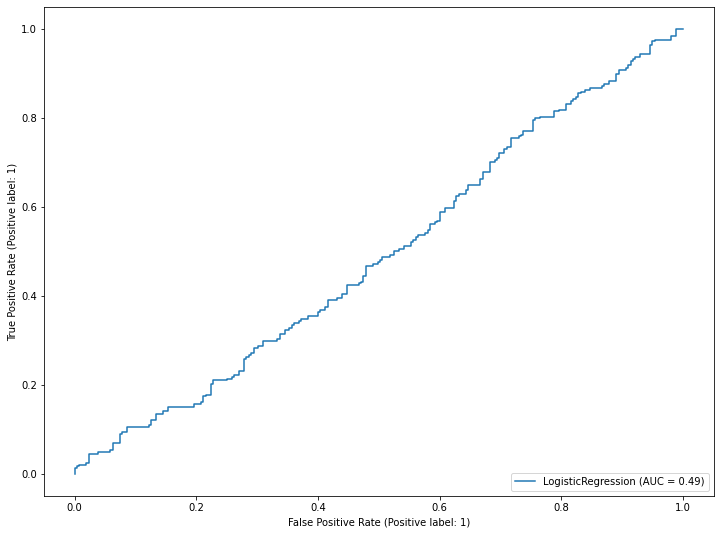

In [1505]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# use default parameters
lr = LogisticRegression()

# fit to train set
lr.fit(X_train, y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(lr, X_val, y_val)

Logistic regression does not work well for this problem. Having `AUC < 0.5` means that the classifier is worse than just randomly guessing the output. Given that we are dealing with very difficult problem, any `AUC > 0.5` would suffice for this task.

Next, we will try a decision tree. Decision trees deal better with non-linear spaces, so it might be able to produce a better model than logistic regression.

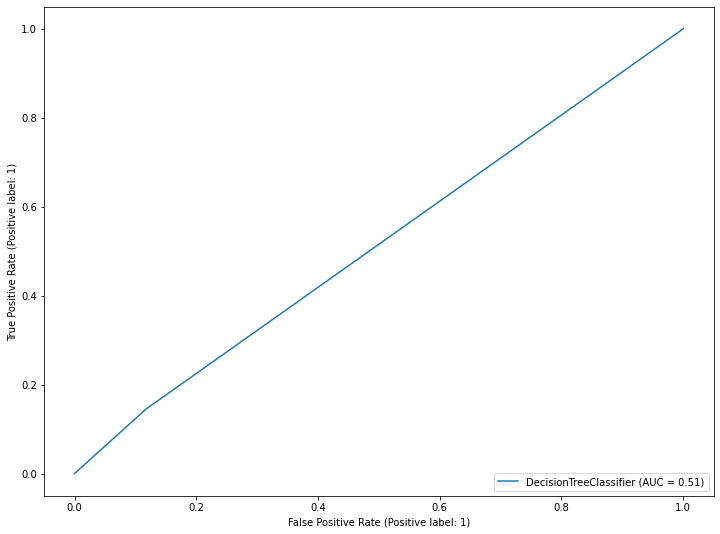

In [1506]:
from sklearn.tree import DecisionTreeClassifier

# remember to use the random seed to be able to reproduce the same results
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train)

plot_roc_curve(dt, X_val, y_val)

The decision tree outperforms the logistic regression model by `0.02`, and its AUC is above 0.5!

Now we will try to use many decision trees, i.e., a forest. [Random forest](https://en.wikipedia.org/wiki/Random_forest) is an ensemble model that builds multiple decision trees, each with different (random) sub-set of attributes. It is generally expected that an ensemble model would outperform a base learner (i.e., the combination of predictions from _many_ decision trees would be better / more stable than the prediction of just one decision tree).

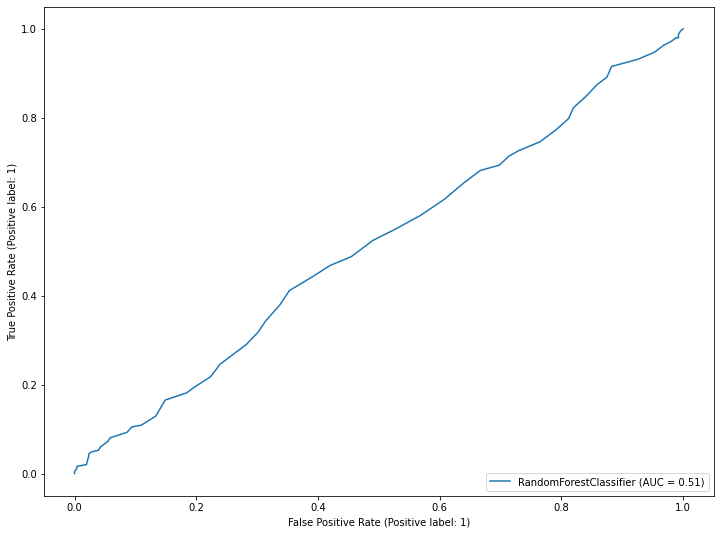

In [1507]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

plot_roc_curve(rf, X_val, y_val)

Contrary to our expectations, the model does not outperform the decision tree, it actually performs the same.

One last ensemble technique that we would like to try is [gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting). This algorithm sets up the stage for our next part, where we will try a deep learning approach to solve the problem. A gradient boosting classifier is structuraly same as any ensemble learner - it is a collection of base learners (think of these as decision trees for simplicity, in theory they can be anything). The algorithm induces (learns) the trees one by one, and in each iteration, it gives greater weight to those instances that were wrongly missclassified, so the next tree would "pay more attention" while training on them. Sometimes this can improve performance.

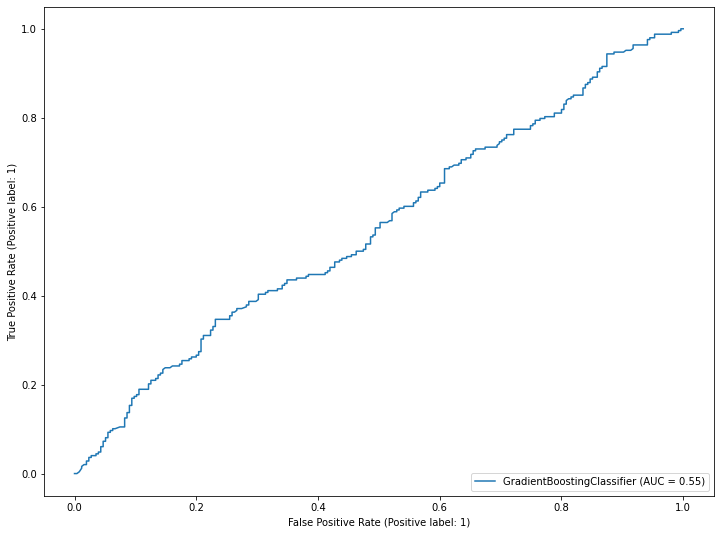

In [1508]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

plot_roc_curve(gb, X_val, y_val)

Indeed it does, the gradient boosting classifier outperform previous models and scored `0.55 AUC`!

We find out that gradient boosting works best for this data set. In the next section, we will train a deep learning model in aim to outperform the baseline set here, i.e., `AUC = 0.55`.

## Deep learning algorithm

We are going to use Google's open-source library [Tensorflow](https://www.tensorflow.org/) for implementing a small neural network. We are using version `2.8.0` of Tensorflow.

In [1509]:
import tensorflow as tf

# set seed for reproducibility of results
tf.random.set_seed(RANDOM_SEED)

print("Tensorflow version", tf.__version__)

Tensorflow version 2.8.0


[Keras](keras.io) is the most popular framework for designing deep learning models. In the next cell, we implement a sequential neural network with:

    1. Normalization layer that scales the data to a common range
    2. A dense layer with 10 neurons and a ReLU activation function.
    3. A dropout layer with 0.2 probability of dropping a neuron.
    4. Another dense layer with 5 neurons and ReLU activation function.
    5. An output layer of just one neuron with a sigmoid activation function (the same one mentioned in the logistic regression part above)
    
Feel free to change, add or remove any of the layers and try to design a better performing model. Given that our data is relatively small, both in terms of training instances as well as in number of columns, it is recommended that the model is small, otherwise it will overfit very quickly.

In [1510]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

In [1511]:
# this configures the model's loss function, weight optimizer, and metrics to keep track of
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)

We are going to train our model for `50` epochs, and keep track of its loss ([binary_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)) and AUC values during each epoch.

To prevent overfitting, we are implementing two callbacks (functions to be called after each epoch):

    1. Learning rate scheduler that decays the learning rate as the number of epochs increases.
    2. Early stopping callback that stops training if the loss does not improve after a certain number of epochs.

In [1512]:
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

In [1513]:
# the model.fit(...) method returns a 'history' object with stats about the training
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50
150/150 [==============================] - 2s 3ms/step - loss: 46.4805 - auc: 0.5066 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.8956 - auc: 0.4980 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.7021 - auc: 0.4998 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6968 - auc: 0.4938 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 1s 3ms/step - loss: 0.6995 - auc: 0.5008 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.7157 - auc: 0.4988 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 9.9005e-04
Epoch 7/50
150/150 [==============================] - 1s 3ms/step - loss: 0.7093 - auc: 0.4981 - val_loss: 0.6931 - val_auc: 

We let the model train for 50 epochs. You can see the change in the learning rate, which is due to the learning rate scheduler callback that we have implemented. The early stopping callback fired, at the 11th epoch, which means that the validation loss has not been improving over time. However, we observe that both the training and the validation AUC are very close to `0.5`, improving the overall score only over the logistic regression model.

With the call of the `model.summary()` method we can get an overview of the structure of the model.

In [1514]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_36 (Normaliza  (None, 10)               21        
 tion)                                                           
                                                                 
 dense_108 (Dense)           (None, 10)                110       
                                                                 
 dropout_36 (Dropout)        (None, 10)                0         
                                                                 
 dense_109 (Dense)           (None, 5)                 55        
                                                                 
 dense_110 (Dense)           (None, 1)                 6         
                                                                 
Total params: 192
Trainable params: 171
Non-trainable params: 21
______________________________________________________

Below, we plot the train and validation loss and AUC values as a function of the epoch. We use the `matplotlib` library, and the _history_ object to do that.

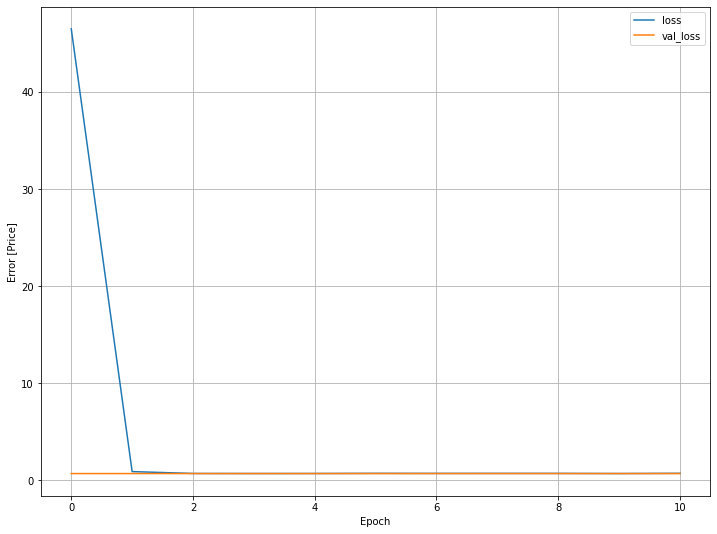

In [1515]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

The training loss starts high, and falls steeply after the first epoch, and then remains pretty much equal, with very little improvements over time. The validation loss does not change, implying that the model is overfitting the training data. There are many possible reasons for this: too complex model, small data set, features that are not predictive, etc. The same situation is observed for the AUC metric in the plot below. The training AUC does vary, reaching its highest point at around `0.506` in the first epoch, but the validation AUC remains fixed at `0.5`.

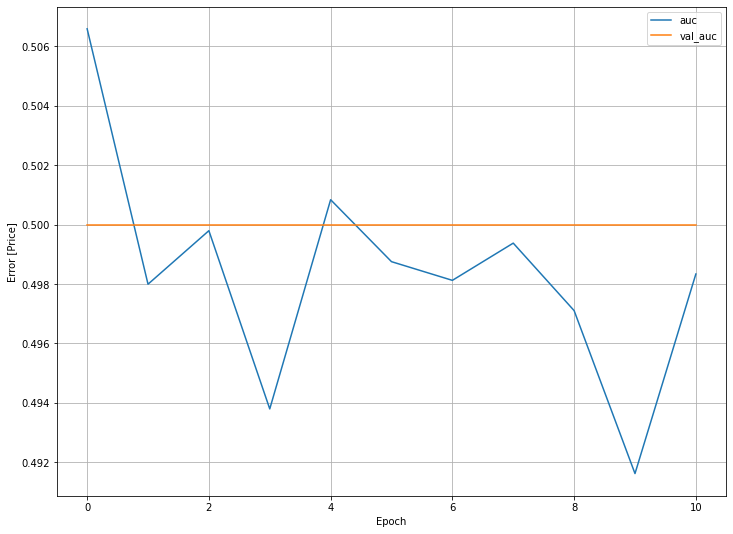

In [1516]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

## Conclusion

The gradient boosting classifier provided the best AUC score on the validation set.
It is a common machine learning practice to train multiple models on the same train / validation data set and provide a model that works best. To simulate a production environment, we have held the test set aside until now.

In the next cell, we are going to evaluate the performance of the gradient boosting classifier on the test set. This is simple as calling `plot_roc_curve` with the test set instead of the validation one.

As a bonus, in the last cell, we are showing a feature importance plot, which plots the importance of each feature in regards to the predictive performance of the model (the higher the value the more _important_ the feature is for determining the value of the target variable).

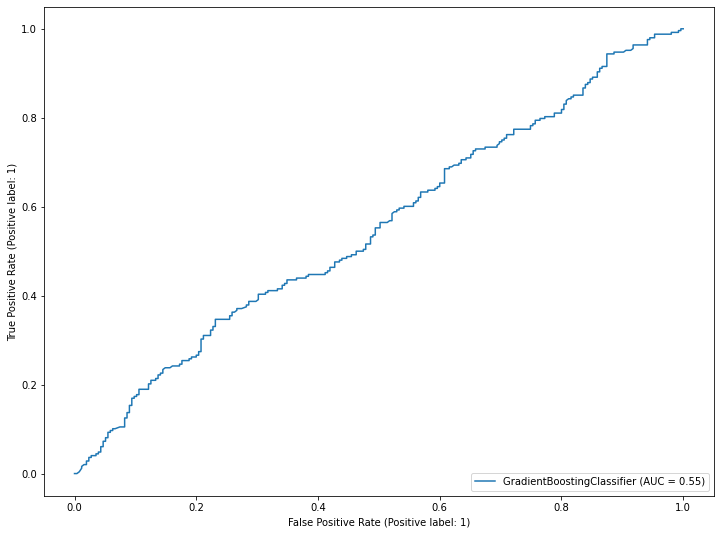

In [1517]:
plot_roc_curve(gb, X_test, y_test)

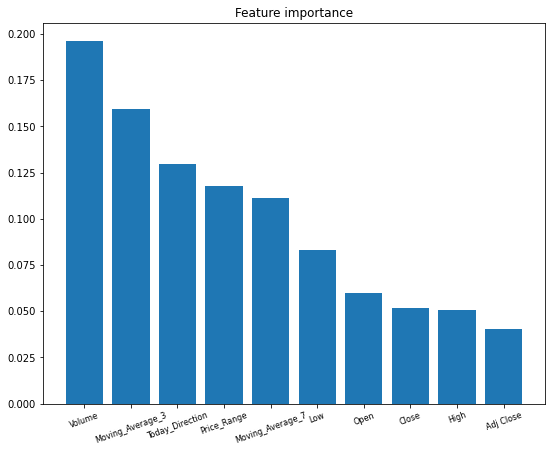

In [1518]:
import numpy as np
# Calculate feature importances
importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_train[X_cols].columns[i] for i in indices]

_ = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)